## 환경 세팅
- 런타임 다시 시작

In [ ]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
d

In [ ]:
import lightgbm
lightgbm.__version__

'3.3.2'

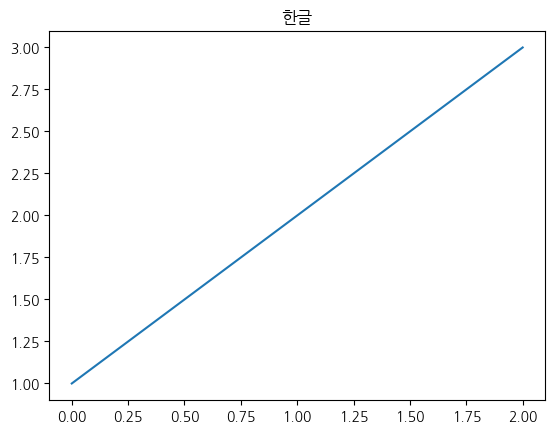

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [ ]:
!pip install palmerpenguins

## 데이터 불러오기

In [ ]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins['ID'] = penguins.reset_index().index + 1
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,ID
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,4
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,5


- 컬럼의 순서를 변경해서, ID가 맨 앞에 오도록 한다.

In [ ]:
cols = penguins.columns.tolist()
cols = cols[-1:] + cols[:-1]
print(cols)

penguins = penguins[cols]
penguins

['ID', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']


,ID,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## 데이터 가공
- 지금까지 열린 대회에서 결측치는 존재하지 않음

In [ ]:
penguins = penguins.dropna().reset_index(drop=True)
penguins

,ID,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
328,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## 데이터셋 분리
- 기사시험과 같이 데이터셋을 만들기 위해 데이터셋을 분리


In [ ]:
from sklearn.model_selection import train_test_split

y = penguins['body_mass_g']
X = penguins.drop(['body_mass_g'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.to_csv("penguin_reg_X_train.csv", index=False)
X_test.to_csv("penguin_reg_X_test.csv", index=False)
y_train.to_csv("penguin_reg_y_train.csv", index=False)
y_test.to_csv("penguin_reg_y_test.csv", index=False)

# 빅데이터 분석기사 시험 시작

In [ ]:
import pandas as pd

X_train = pd.read_csv('penguin_reg_X_train.csv')
X_test = pd.read_csv('penguin_reg_X_test.csv')
y_train = pd.read_csv('penguin_reg_y_train.csv')

print(X_train.shape, X_test.shape, y_train.shape)

(233, 8) (100, 8) (233, 1)


In [ ]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 233 non-null    int64  
 1   species            233 non-null    object 
 2   island             233 non-null    object 
 3   bill_length_mm     233 non-null    float64
 4   bill_depth_mm      233 non-null    float64
 5   flipper_length_mm  233 non-null    float64
 6   sex                233 non-null    object 
 7   year               233 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 14.7+ KB
None


In [ ]:
X_train_id = X_train.pop("ID")
X_test_id = X_test.pop("ID")

print(X_train.shape, X_test.shape)

(233, 7) (100, 7)


In [ ]:
print(X_train.head(1))

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm     sex  \
0  Adelie  Biscoe            40.5           17.9              187.0  female   

   year  
0  2007  


In [ ]:
print(X_train.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
sex                  0
year                 0
dtype: int64


In [ ]:
import numpy as np

cat_cols = X_train.select_dtypes(exclude = np.number).columns.tolist()
num_cols = X_train.select_dtypes(include = np.number).columns.tolist()

print(cat_cols, num_cols)

['species', 'island', 'sex'] ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'year']


In [ ]:
num_cols.remove('year')
num_cols # StandardScaler

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

In [ ]:
cat_cols = cat_cols + ['year']
cat_cols # 원핫 인코딩

['species', 'island', 'sex', 'year']

## 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train['body_mass_g'],
    stratify = X_train['sex'],
    test_size=0.3,
    random_state=42
)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((163, 7), (70, 7), (163,), (70,))

## 모델 만들기

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.fixes import loguniform
from sklearn.metrics import make_scorer, mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

import numpy as np

def rmse(y_tr, y_val):
    return np.sqrt(mean_squared_error(y_tr, y_val))

param_grid = {
    "clf__learning_rate": loguniform(0.0001, 0.1),
    "clf__n_estimators" : np.arange(30, 50),
    "clf__max_depth" : np.arange(3, 30, 2),
    "clf__num_leaves" : np.arange(30, 50),
    "clf__min_split_gain" : np.arange(0, 1.1, 0.1),
    "clf__subsample" : np.arange(0.6, 1.0, 0.1)
}

column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), num_cols),
    ("ohd_encoder", OneHotEncoder(), cat_cols)
], remainder="passthrough")

pipeline = Pipeline([
    ("preprocessing", column_transformer),
    ("clf", LGBMRegressor(random_state=42))
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions = param_grid,
    n_iter = 10,
    scoring = make_scorer(rmse, greater_is_better=False),
    cv=5,
    verbose=-1,
    n_jobs=-1
)

random_search.fit(X_tr, y_tr)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               ['bill_length_mm',
                                                                                'bill_depth_mm',
                                                                                'flipper_length_mm']),
                                                                              ('ohd_encoder',
                                                                               OneHotEncoder(),
                                                                               ['species',
                                                                                'island',
                                                                                'sex',
                                                                                'year'])])),
                                             ('clf',
                                              LGBMRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'cl...
                                        'clf__min_split_gain': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'clf__n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                                        'clf__num_leaves': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                                        'clf__subsample': array([0.6, 0.7, 0.8, 0.9])},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=-1)

## 예측

In [ ]:
def get_score(model, X_tr, X_val, y_tr, y_val):
    tr_pred = model.predict(X_tr) # 만약 확률로 구할시, predict_proba()[:, 1]
    val_pred = model.predict(X_val)
    tr_score = rmse(y_tr, tr_pred)
    val_score = rmse(y_val, val_pred)
    return f"train: {tr_score}, validation: {val_score}"

get_score(random_search, X_tr, X_val, y_tr, y_val)

'train: 264.4597570295416, validation: 316.76867451477074'

## 평가 제출

In [ ]:
final_preds = random_search.predict(X_test)
result = pd.DataFrame({
    "ID" : X_test_id,
    "preds": final_preds.astype("int64")
})

result.head()

,ID,preds
0,31,3380
1,321,3614
2,80,4071
3,203,4530
4,64,3894


In [ ]:
result.to_csv('김하정.csv')